In [1]:
import sklearn as skl
import sklearn_som
from sklearn_som.som import SOM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
df_3E_UV = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_3E_UV.csv.gz')
df_5E_UV = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_5E_UV.csv.gz')
df_7E_UV = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_7E_UV.csv.gz')
df_10E_UV = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_10E_UV.csv.gz')

# df_3E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_3E_01.csv.gz')
# df_5E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_5E_01.csv.gz')
# df_7E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_7E_01.csv.gz')
# df_10E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_specz_SOMpred_10E_01.csv.gz')

In [3]:
w_3E_UV = np.loadtxt('/project2/chihway/raulteixeira/data/deepfields_weights_3E_UV.txt')
w_5E_UV = np.loadtxt('/project2/chihway/raulteixeira/data/deepfields_weights_5E_UV.txt')
w_7E_UV = np.loadtxt('/project2/chihway/raulteixeira/data/deepfields_weights_7E_UV.txt')
w_10E_UV = np.loadtxt('/project2/chihway/raulteixeira/data/deepfields_weights_10E_UV.txt')

# w_3E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_weights_3E_01.txt')
# w_5E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_weights_5E_01.txt')
# w_7E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_weights_7E_01.txt')
# w_10E_01 = pd.read_csv('/project2/chihway/raulteixeira/data/deepfields_weights_10E_01.txt')

In [4]:
n = 48
weights = w_10E_UV.reshape(n, n, 8)

In [14]:
labellist=['$I$']
labellist+=([f'{band}-$I$' for band in [r'$G$', r'$R$', r'$Z$', r'$U$', r'$J$', r'$H$', r'$K_S$']])

In [15]:
labellist

['$I$',
 '$G$-$I$',
 '$R$-$I$',
 '$Z$-$I$',
 '$U$-$I$',
 '$J$-$I$',
 '$H$-$I$',
 '$K_S$-$I$']

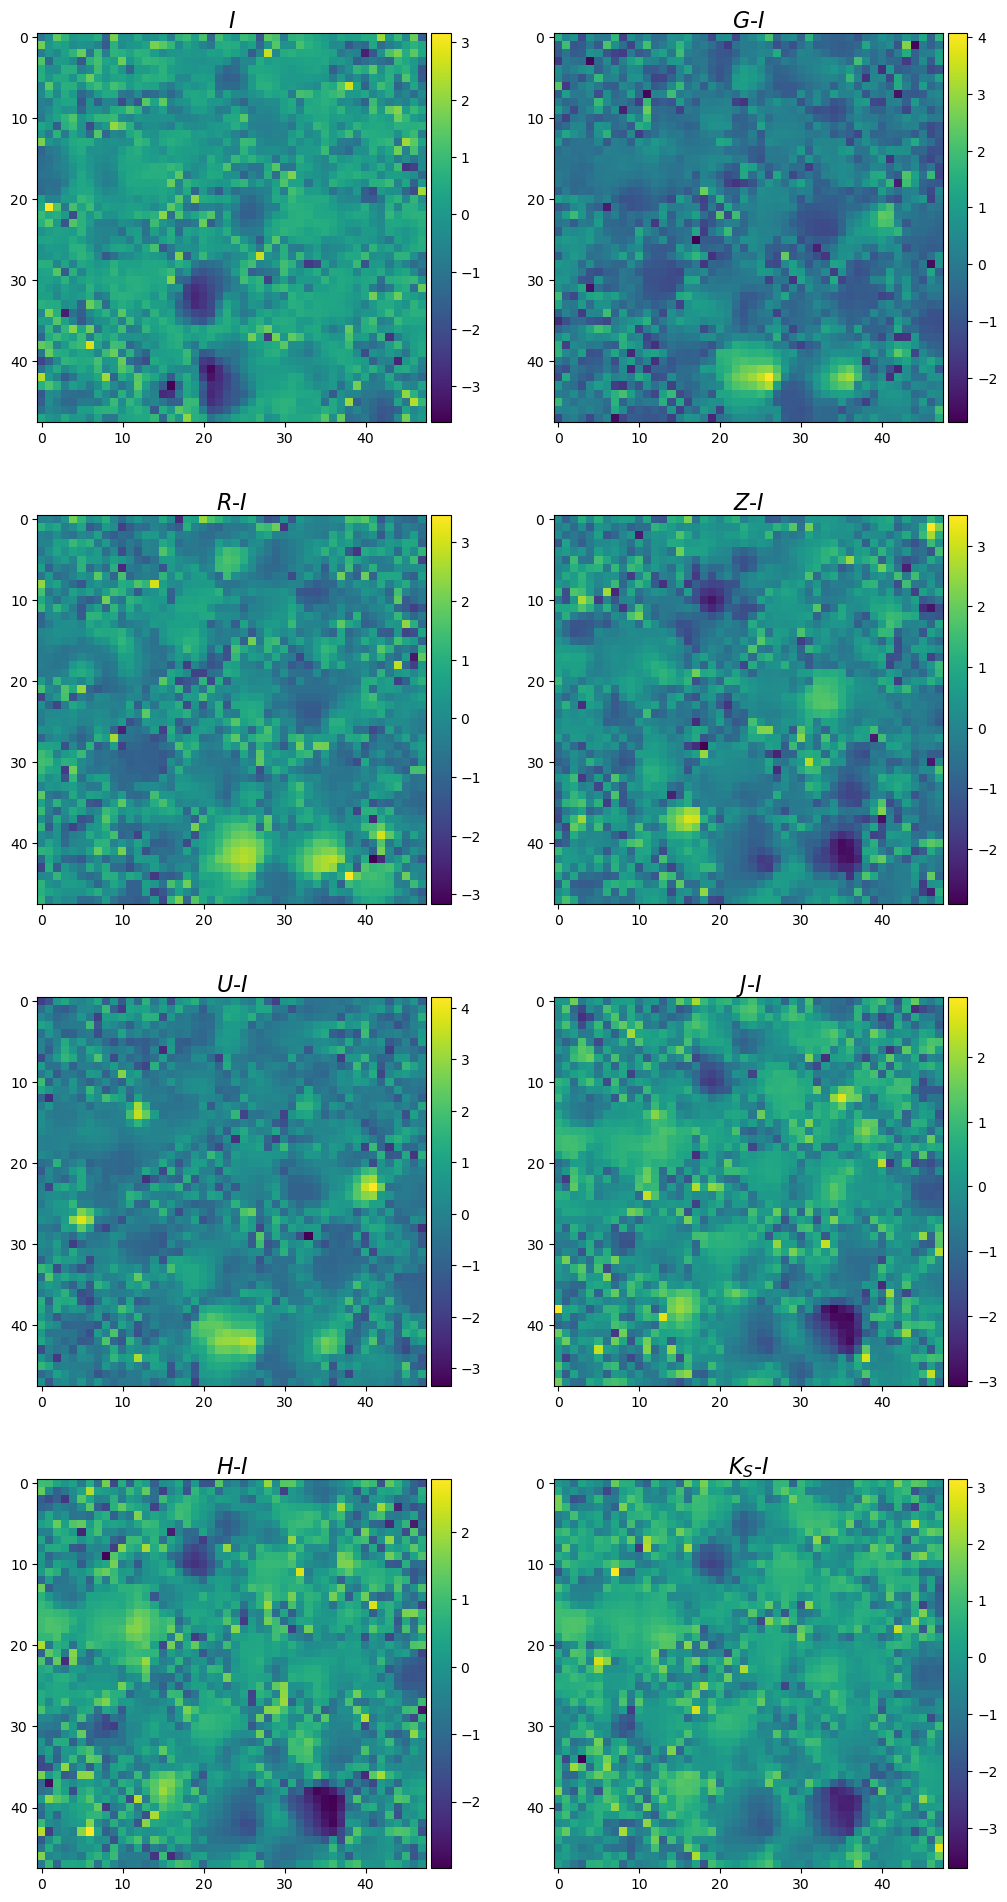

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

for i in range(4):
    for j in range(2):
        im = axes[i,j].imshow(weights[:,:,2*i+j])
        divider = make_axes_locatable(axes[i,j])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[i,j].set_xlabel(f'{labellist[2*i+j]}', fontsize=16)
        axes[i,j].xaxis.set_label_position('top') 

fig.subplots_adjust(wspace=0.25)
plt.show()

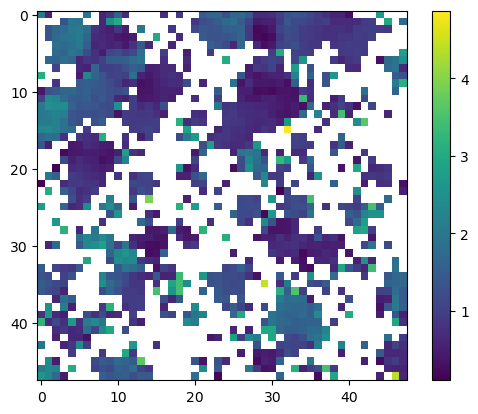

In [45]:
square = df_3E_UV[['zspec', 'cell_wide']].groupby('cell_wide').agg(['mean', 'median', 'std'])

im = np.zeros(n*n)+np.nan

indices = np.array(square.index)

im[indices]=square[('zspec', 'mean')].values

im=im.reshape(n,n);

plt.imshow(im)
plt.colorbar()

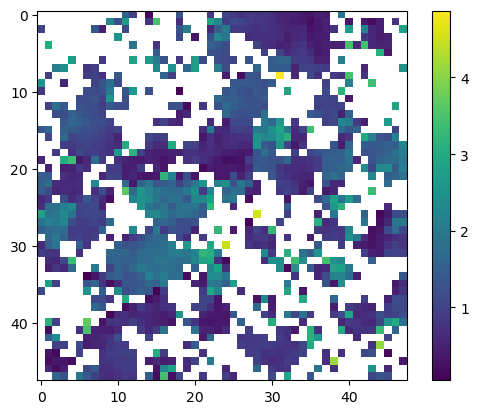

In [46]:
square = df_5E_UV[['zspec', 'cell_wide']].groupby('cell_wide').agg(['mean', 'median', 'std'])

im = np.zeros(n*n)+np.nan

indices = np.array(square.index)

im[indices]=square[('zspec', 'mean')].values

im=im.reshape(n,n);

plt.imshow(im)
plt.colorbar()

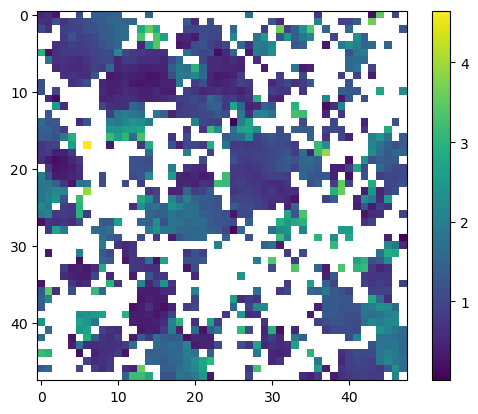

In [47]:
square = df_7E_UV[['zspec', 'cell_wide']].groupby('cell_wide').agg(['mean', 'median', 'std'])

im = np.zeros(n*n)+np.nan

indices = np.array(square.index)

im[indices]=square[('zspec', 'mean')].values

im=im.reshape(n,n);

plt.imshow(im)
plt.colorbar()

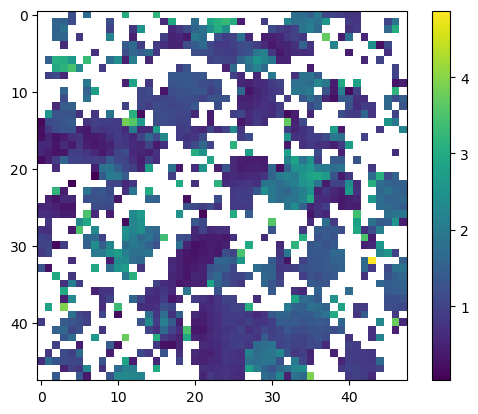

In [48]:
square = df_10E_UV[['zspec', 'cell_wide']].groupby('cell_wide').agg(['mean', 'median', 'std'])

im = np.zeros(n*n)+np.nan

indices = np.array(square.index)

im[indices]=square[('zspec', 'mean')].values

im=im.reshape(n,n);

plt.imshow(im)
plt.colorbar()

In [49]:
df_10E_UV.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'RA', 'DEC', 'KNN_CLASS',
       'BDF_FLUX_DERED_CALIB_U', 'BDF_FLUX_DERED_CALIB_G',
       'BDF_FLUX_DERED_CALIB_R', 'BDF_FLUX_DERED_CALIB_I',
       'BDF_FLUX_DERED_CALIB_Z', 'BDF_FLUX_DERED_CALIB_J',
       'BDF_FLUX_DERED_CALIB_H', 'BDF_FLUX_DERED_CALIB_KS',
       'BDF_FLUX_ERR_DERED_CALIB_U', 'BDF_FLUX_ERR_DERED_CALIB_G',
       'BDF_FLUX_ERR_DERED_CALIB_R', 'BDF_FLUX_ERR_DERED_CALIB_I',
       'BDF_FLUX_ERR_DERED_CALIB_Z', 'BDF_FLUX_ERR_DERED_CALIB_J',
       'BDF_FLUX_ERR_DERED_CALIB_H', 'BDF_FLUX_ERR_DERED_CALIB_KS', 'zspec',
       'cell_wide'],
      dtype='object')